In [132]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sampler import GibbsSampler
from document import Document
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("21000_samples_train_data.csv")

In [134]:
df.drop(columns= "gender", inplace = True)

In [135]:
df.head()

,Id,labels,filtered clean text
0,13,19,write black magic african american religion tr...
1,41,4,works firefighter other around madison wiscons...
2,42,11,ms maier see patients dr supervising physician...
3,50,20,specialize commercial advertising editorial ph...
4,56,6,maintains tumblr blog document sleuth spot hom...


In [136]:
X = df['filtered clean text']
y = df['labels']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.99, random_state=42)

In [114]:
X_train.shape

(210,)

In [115]:
y_train.shape

(210,)

In [137]:
term_frequencies  = TfidfVectorizer().fit(X)

X = term_frequencies.transform(X)

In [139]:
# Seed for randomness.
random_seed = 0
np.random.seed(random_seed)

# Load data.
term_frequencies = X.todense()
labels = y

In [140]:
term_frequencies.shape

(21000, 22087)

In [141]:
# Keep only 20% of the labels.
visible_labels = [labels if np.random.uniform(0, 1) < 0.2 else None for labels in labels]
print(visible_labels[:10])

[None, None, None, None, None, None, None, None, None, None]


In [142]:
len(visible_labels)

21000

In [143]:
# Create documents documents.
docs = [Document(term_frequencies[index], label=visible_labels[index]) for index in range(len(labels))]

In [144]:
# Initialize sampler.
sampler = GibbsSampler(docs, num_classes=28, random_seed=random_seed)

# Gibbs sampling now!
num_iterations = 20
for iteration in range(1, num_iterations + 1):
    sampler.sample()
    print('Iteration %d of Gibbs sampling complete!' % iteration)

# Obtain predicted labels.
predicted_labels = sampler.predict()
print('Predicted labels: %s' % predicted_labels)

Iteration 1 of Gibbs sampling complete!
Iteration 2 of Gibbs sampling complete!
Iteration 3 of Gibbs sampling complete!
Iteration 4 of Gibbs sampling complete!
Iteration 5 of Gibbs sampling complete!
Iteration 6 of Gibbs sampling complete!
Iteration 7 of Gibbs sampling complete!
Iteration 8 of Gibbs sampling complete!
Iteration 9 of Gibbs sampling complete!
Iteration 10 of Gibbs sampling complete!
Iteration 11 of Gibbs sampling complete!
Iteration 12 of Gibbs sampling complete!
Iteration 13 of Gibbs sampling complete!
Iteration 14 of Gibbs sampling complete!
Iteration 15 of Gibbs sampling complete!
Iteration 16 of Gibbs sampling complete!
Iteration 17 of Gibbs sampling complete!
Iteration 18 of Gibbs sampling complete!
Iteration 19 of Gibbs sampling complete!
Iteration 20 of Gibbs sampling complete!
Predicted labels: [25  8  8 ...  0 23  0]


In [127]:
predicted_labels

array([27,  3, 27, 27,  7,  4,  0, 24,  7,  7,  2,  3, 27,  3, 21,  3, 17,
        7, 17,  8,  4,  3, 15, 24,  7,  4,  8, 24, 27, 11, 11,  5,  9,  9,
        8, 27, 27, 11,  6,  7,  2,  3, 27, 26, 27,  0,  7,  2,  8, 26,  1,
       27,  8, 11,  0,  6, 27, 24,  6,  1,  7,  2, 24,  1, 11,  7,  6, 25,
       27, 24,  7, 24, 21, 27,  3, 24, 11,  6, 27, 10,  4,  8,  9,  1,  9,
       15,  3, 19,  9, 27,  6, 27,  0, 11, 27, 19,  0, 12,  0,  5,  4, 24,
       27, 27, 23,  4,  2,  7,  7,  4, 21,  8, 21, 26,  3,  1,  7, 24, 27,
        7,  1,  6, 11,  7, 15, 23, 27, 26, 27,  2, 27,  2, 18,  9,  8,  3,
       21, 23, 12,  9,  7,  7, 27,  7,  9, 21, 11, 27,  7, 27,  1, 15,  3,
        1, 17,  0,  7,  3, 27, 15, 23, 27,  6,  6, 24,  1, 24, 27,  3,  0,
       27, 23,  4, 26,  3,  2,  7, 27,  0, 15, 27, 27,  7, 24,  7, 27,  7,
       15, 24,  6,  2,  4, 26,  7,  0,  9, 27,  7, 23, 24, 27,  3, 24,  4,
        3, 22, 27,  4, 23,  7])

In [128]:
labels

13674     0
17693    12
18256    16
15420    11
13171    21
         ..
20161    22
4399     24
18626    14
3501     12
1466     18
Name: labels, Length: 210, dtype: int64

In [125]:
from sklearn.manifold import TSNE
term_frequencies_reduced = TSNE(n_components=2).fit_transform(term_frequencies)

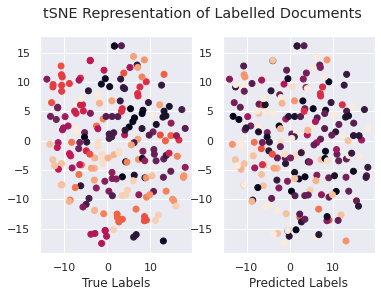

In [126]:
# Plotting.
# Set styles.
sns.set_style('darkgrid')
sns.set(font='DejaVu Sans')

# Plot 2-dimensional tSNE representation of documents.
fig, axs = plt.subplots(ncols=2)
axs[0].scatter(term_frequencies_reduced[:, 0], term_frequencies_reduced[:, 1], c=labels)
axs[1].scatter(term_frequencies_reduced[:, 0], term_frequencies_reduced[:, 1], c=predicted_labels)
axs[0].set_xlabel('True Labels')
axs[1].set_xlabel('Predicted Labels')
plt.suptitle('tSNE Representation of Labelled Documents')
plt.show()

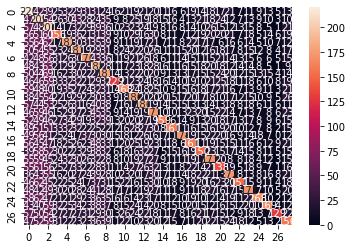

In [32]:
# Plot confusion matrix.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(labels, predicted_labels), annot=True, fmt='d')
plt.show()